In [9]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [10]:
reader=pd.read_excel('Dry_Bean_Dataset.xlsx')
df=pd.DataFrame(reader)

In [11]:
df1=df.drop(["Class"],axis=1)
tempClass=df["Class"]
logistic=LogisticRegression(max_iter=50000,random_state=2)
gaussian = GaussianNB()

In [12]:
colors = []
for i in range(15):
    colors.append('#%06X' % np.random.randint(0, 0xFFFFFF))
myClass=list(set(tempClass))

In [13]:
def plot(i):
    df2=df.copy()
    df2['Class']=df2['Class'].apply(lambda x: 1 if x==myClass[i] else 0)
    df3=df2.drop('Class',axis=1)
    tempClass2=df2['Class']
    trainX, testX, trainY, testY = train_test_split(df3,tempClass2, test_size=0.2, random_state=2)
    resPCA=PCA(n_components=8)
    trainX=resPCA.fit_transform(trainX)
    testX=resPCA.transform(testX)
    gaussian.fit(trainX,trainY)
    probY=gaussian.predict_proba(testX)[:,1]
    fpr,tpr,_=roc_curve(testY,probY)
    rocAUC=roc_auc_score(testY,probY)
    plt.plot(fpr,tpr,color=colors[i],label='ROC curve of class {0} (area is {1:0.3f})'.format(myClass[i],rocAUC))
    

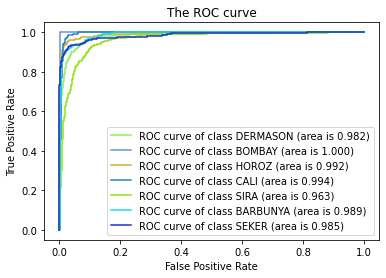

In [14]:
for i in range (len(myClass)):
    plot(i)
plt.legend(loc='lower right')
plt.title('The ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()